In [ ]:
!pip install apimoex

In [ ]:
import requests

import apimoex
import pandas as pd

with requests.Session() as session:
    data = apimoex.get_board_history(session, 'GAZP', columns= ['TRADEDATE', 'SHORTNAME', 'SECID', 'OPEN', 'LOW', 'HIGH', 'CLOSE'])
    df = pd.DataFrame(data)
    print(df.columns)
    # df.set_index('TRADEDATE', inplace=True)
    print(df.tail(10), '\n')
    df.info()

Index(['TRADEDATE', 'SHORTNAME', 'SECID', 'OPEN', 'LOW', 'HIGH', 'CLOSE'], dtype='object')
       TRADEDATE   SHORTNAME SECID    OPEN     LOW    HIGH   CLOSE
2614  2024-10-14  ГАЗПРОМ ао  GAZP  131.50  130.51  133.35  131.92
2615  2024-10-15  ГАЗПРОМ ао  GAZP  131.85  131.43  134.40  133.97
2616  2024-10-16  ГАЗПРОМ ао  GAZP  134.03  133.96  138.80  137.24
2617  2024-10-17  ГАЗПРОМ ао  GAZP  137.49  134.80  138.29  136.05
2618  2024-10-18  ГАЗПРОМ ао  GAZP  136.27  134.80  137.30  135.67
2619  2024-10-21  ГАЗПРОМ ао  GAZP  135.68  135.11  136.60  135.97
2620  2024-10-22  ГАЗПРОМ ао  GAZP  136.12  135.51  140.08  136.24
2621  2024-10-23  ГАЗПРОМ ао  GAZP  136.00  134.13  137.50  134.76
2622  2024-10-24  ГАЗПРОМ ао  GAZP  134.94  132.15  135.20  134.12
2623  2024-10-25  ГАЗПРОМ ао  GAZP  134.15  132.00  136.50  133.00 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------

In [ ]:
df[df.isnull().any(axis=1) == True]

,TRADEDATE,SHORTNAME,SECID,OPEN,LOW,HIGH,CLOSE
1913,2022-01-07,ГАЗПРОМ ао,GAZP,NaN,NaN,NaN,NaN
1946,2022-02-23,ГАЗПРОМ ао,GAZP,NaN,NaN,NaN,NaN
1949,2022-02-28,ГАЗПРОМ ао,GAZP,NaN,NaN,NaN,NaN
1950,2022-03-01,ГАЗПРОМ ао,GAZP,NaN,NaN,NaN,NaN
1951,2022-03-02,ГАЗПРОМ ао,GAZP,NaN,NaN,NaN,NaN
1952,2022-03-03,ГАЗПРОМ ао,GAZP,NaN,NaN,NaN,NaN
1953,2022-03-04,ГАЗПРОМ ао,GAZP,NaN,NaN,NaN,NaN
1954,2022-03-09,ГАЗПРОМ ао,GAZP,NaN,NaN,NaN,NaN
1955,2022-03-10,ГАЗПРОМ ао,GAZP,NaN,NaN,NaN,NaN
1956,2022-03-11,ГАЗПРОМ ао,GAZP,NaN,NaN,NaN,NaN


Пока что такие строки буду удалять, а там посмотрим.

In [ ]:
df_cleaned = df.dropna()
df_clean = df_cleaned.reset_index(drop=True)
df_clean['TRADEDATE'] = pd.to_datetime(df_clean['TRADEDATE'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2606 entries, 0 to 2605
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TRADEDATE  2606 non-null   datetime64[ns]
 1   SHORTNAME  2606 non-null   object        
 2   SECID      2606 non-null   object        
 3   OPEN       2606 non-null   float64       
 4   LOW        2606 non-null   float64       
 5   HIGH       2606 non-null   float64       
 6   CLOSE      2606 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 142.6+ KB


In [ ]:
 df_clean.head()

,TRADEDATE,SHORTNAME,SECID,OPEN,LOW,HIGH,CLOSE
0,2014-06-09,ГАЗПРОМ ао,GAZP,144.00,143.03,146.20,144.40
1,2014-06-10,ГАЗПРОМ ао,GAZP,144.31,142.67,144.76,144.75
2,2014-06-11,ГАЗПРОМ ао,GAZP,145.20,143.90,146.40,146.40
3,2014-06-16,ГАЗПРОМ ао,GAZP,144.00,142.58,145.27,145.20
4,2014-06-17,ГАЗПРОМ ао,GAZP,145.30,143.72,146.37,144.77


In [ ]:
df_clean

,TRADEDATE,SHORTNAME,SECID,OPEN,LOW,HIGH,CLOSE
0,2014-06-09,ГАЗПРОМ ао,GAZP,144.00,143.03,146.20,144.40
1,2014-06-10,ГАЗПРОМ ао,GAZP,144.31,142.67,144.76,144.75
2,2014-06-11,ГАЗПРОМ ао,GAZP,145.20,143.90,146.40,146.40
3,2014-06-16,ГАЗПРОМ ао,GAZP,144.00,142.58,145.27,145.20
4,2014-06-17,ГАЗПРОМ ао,GAZP,145.30,143.72,146.37,144.77
...,...,...,...,...,...,...,...
2601,2024-10-21,ГАЗПРОМ ао,GAZP,135.68,135.11,136.60,135.97
2602,2024-10-22,ГАЗПРОМ ао,GAZP,136.12,135.51,140.08,136.24
2603,2024-10-23,ГАЗПРОМ ао,GAZP,136.00,134.13,137.50,134.76
2604,2024-10-24,ГАЗПРОМ ао,GAZP,134.94,132.15,135.20,134.12


In [ ]:
data_frames = {}
row = df_clean.iloc[0]
data_frames[row['SECID']] = { 'short_name': row['SHORTNAME'], 'data_frame': df_clean.drop(['SHORTNAME', 'SECID'], axis=1) }

In [ ]:
data_frames

{'GAZP': {'short_name': 'ГАЗПРОМ ао',
  'data_frame':       TRADEDATE    OPEN     LOW    HIGH   CLOSE
  0    2014-06-09  144.00  143.03  146.20  144.40
  1    2014-06-10  144.31  142.67  144.76  144.75
  2    2014-06-11  145.20  143.90  146.40  146.40
  3    2014-06-16  144.00  142.58  145.27  145.20
  4    2014-06-17  145.30  143.72  146.37  144.77
  ...         ...     ...     ...     ...     ...
  2601 2024-10-21  135.68  135.11  136.60  135.97
  2602 2024-10-22  136.12  135.51  140.08  136.24
  2603 2024-10-23  136.00  134.13  137.50  134.76
  2604 2024-10-24  134.94  132.15  135.20  134.12
  2605 2024-10-25  134.15  132.00  136.50  133.00
  
  [2606 rows x 5 columns]}}

Для получения наибольшего числа данных нужно больше тикетов компаний, поэтому добудем их используя beautiful soup.

In [ ]:
!pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

url = "https://fin-plan.org/lk/actions/all/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}
response = requests.get(url, headers=headers)
if response.status_code == 200:
    # получаем html страницы
    soup = BeautifulSoup(response.text, 'html.parser')
    # находим ссылки
    links = soup.find_all('a', href=True)
    # прописываем паттерн для поиска ссылок
    pattern = re.compile(r'/lk/actions/[0-9A-Z]+/')
    found_links = []
    for link in links:
        href = link['href']
        # проверяем паттерн
        if pattern.match(href):
            found_links.append(href)
    for found_link in found_links:
        print(found_link)
else:
    print(f"Ошибка при получении страницы: {response.status_code}")

/lk/actions/RU0009071187/
/lk/actions/RU000A0JQ433/
/lk/actions/RU000A107KX0/
/lk/actions/RU0007252813/
/lk/actions/RU000A0JP468/
/lk/actions/RU000A108LJ5/
/lk/actions/RU000A0JXS91/
/lk/actions/RU000A0JS5T7/
/lk/actions/RU000A0DM7B3/
/lk/actions/RU0009028674/
/lk/actions/RU0008081765/
/lk/actions/RU000A108ZR8/
/lk/actions/RU000A0JP4J4/
/lk/actions/RU000A0JP0Q7/
/lk/actions/RU000A0D8MM8/
/lk/actions/RU000A106T36/
/lk/actions/RU000A0B88G6/
/lk/actions/RU0009062285/
/lk/actions/RU000A100EP4/
/lk/actions/RU000A1007R9/
/lk/actions/RU0009100945/
/lk/actions/RU000A0JP0U9/
/lk/actions/RU000A0JWNX4/
/lk/actions/KZ1C00001023/
/lk/actions/RU0009059216/
/lk/actions/RU0009100176/
/lk/actions/RU0007976957/
/lk/actions/RU0007976965/
/lk/actions/RU000A0J2QG8/
/lk/actions/RU000A0JS2M9/
/lk/actions/RU0009288658/
/lk/actions/RU000A108K09/
/lk/actions/RU0009100291/
/lk/actions/RU000A0JP5V6/
/lk/actions/RU000A0JR282/
/lk/actions/RU000A0JR2C1/
/lk/actions/RU000A0JR2A5/
/lk/actions/RU000A0JS9K8/
/lk/actions/

In [ ]:
len(found_links)

366

In [ ]:
found_secids = []
actions = found_links
# получение всех тикетов
for action in actions:
  url = f'https://fin-plan.org{action}'
  print(url)
  headers = {
      "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
  }
  response = requests.get(url, headers=headers)
  if response.status_code == 200:
      # получаем html страницы
      soup = BeautifulSoup(response.text, 'html.parser')
      # находим h1 заголовок
      h1_names = soup.find_all('h1')
      # паттерн для тикета secid
      pattern = re.compile(r'\(.+\)')
      for name in h1_names:
          # находим все совпадения
          finded = re.findall(pattern, str(name))
          print(f'finded = {finded}')
          for find in finded:
              # добавляем найденный тикет
              found_secids.append(find[1:-1])
  else:
      print(f"Ошибка при получении страницы: {response.status_code}")

https://fin-plan.org/lk/actions/RU0009071187/
finded = ['(AVAZ)']
https://fin-plan.org/lk/actions/RU000A0JQ433/
finded = ['(AVAZP)']
https://fin-plan.org/lk/actions/RU000A107KX0/
finded = ['(KLVZ)']
https://fin-plan.org/lk/actions/RU0007252813/
finded = ['(ALRS)']
https://fin-plan.org/lk/actions/RU000A0JP468/
finded = ['(ALNU)']
https://fin-plan.org/lk/actions/RU000A108LJ5/
finded = ['(APRI)']
https://fin-plan.org/lk/actions/RU000A0JXS91/
finded = ['(ACKO)']
https://fin-plan.org/lk/actions/RU000A0JS5T7/
finded = ['(ABRD)']
https://fin-plan.org/lk/actions/RU000A0DM7B3/
finded = ['(AVAN)']
https://fin-plan.org/lk/actions/RU0009028674/
finded = ['(AKRN)']
https://fin-plan.org/lk/actions/RU0008081765/
finded = ['(APTK)']
https://fin-plan.org/lk/actions/RU000A108ZR8/
finded = ['(DATA)']
https://fin-plan.org/lk/actions/RU000A0JP4J4/
finded = ['(ARMD)']
https://fin-plan.org/lk/actions/RU000A0JP0Q7/
finded = ['(ARSA)']
https://fin-plan.org/lk/actions/RU000A0D8MM8/
finded = ['(ASSB)']
https://f

In [ ]:
found_secids

['AVAZ',
 'AVAZP',
 'KLVZ',
 'ALRS',
 'ALNU',
 'APRI',
 'ACKO',
 'ABRD',
 'AVAN',
 'AKRN',
 'APTK',
 'DATA',
 'ARMD',
 'ARSA',
 'ASSB',
 'ASTR',
 'AMEZ',
 'AFLT',
 'RU000A100EP4',
 'RU000A1007R9',
 'BSPB',
 'BSPBP',
 'FTRE',
 'ABBN',
 'BISV',
 'BISVP',
 'BANE',
 'BANEP',
 'BLNG',
 'ALBK',
 'BRZL',
 'VSEH',
 'VSMO',
 'VTBR',
 'RU000A0JR282',
 'RU000A0JR2C1',
 'RU000A0JR2A5',
 'VTRS',
 'WUSH',
 'VLHZ',
 'VDSB',
 'VJGZ',
 'VJGZP',
 'VZRZ',
 'VZRZP',
 'VGSB',
 'VGSBP',
 'VSYD',
 'VSYDP',
 'GAZA',
 'GAZAP',
 'GAZT',
 'GAZS',
 'GAZC',
 'GAZP',
 'GTSS',
 'GRNT',
 'GMKN',
 'GTRK',
 'RTGZ',
 'SIBN',
 'HALS',
 'GTPR',
 'FESH',
 'DIXY',
 'DVEC',
 'DASB',
 'DERZP',
 'DSKY',
 'DIAS',
 'UTSY',
 'EUTR',
 'EELT',
 'LEAS',
 'ZVEZ',
 'ZILL',
 'ZMZN',
 'ZMZNP',
 'ZAYM',
 'IVAT',
 'RUSI',
 'AQUA',
 'INGR',
 'IRKT',
 'RU000A0JVEZ0',
 'RU000A0JVT35',
 'RU000A0JTXM2',
 'RU000A0JUW49',
 'RU000A0JUGA0',
 'RU000A0JUHS0',
 'RU000A0JUQZ6',
 'IGSTP',
 'IGST',
 'IDVP',
 'IRAO',
 'IRGZ',
 'KMAZ',
 'KZMS',
 'KMEZ',
 

In [ ]:
data_frames = {}
index = 1
remove_secids = []
for secid in found_secids:
    print(f"{index}/{len(found_secids)} {secid}")
    index += 1
    with requests.Session() as session:
        # получение данных по secid
        data = apimoex.get_board_history(session, secid, columns= ['TRADEDATE', 'SHORTNAME', 'SECID', 'OPEN', 'LOW', 'HIGH', 'CLOSE'])
        df = pd.DataFrame(data)
        # проверка, если не нашел.
        if df.empty:
            # дополняем список для удаления
            remove_secids.append(secid)
            print('empty')
            continue
        # получаем пропуски и выводим процент
        miss = df[df.isnull().any(axis=1) == True]
        print(f"{miss.shape[0] / df.shape[0] * 100:.2f}% пропусков ({miss.shape[0]} из {df.shape[0]})")
        # удаляем строки с пропусками
        df_cleaned = df.dropna()
        # обновляем индексы после удаления
        df_clean = df_cleaned.reset_index(drop=True)
        # дату переделываем в соответствующий тип данных
        df_clean['TRADEDATE'] = pd.to_datetime(df_clean['TRADEDATE'])
        # проверка, если все строки были пустыми
        if df_clean.empty:
            # дополняем список для удаления
            remove_secids.append(secid)
            print('empty')
            continue
        # получаем первую строку
        row = df_clean.iloc[0]
        # преобразуем в хэш, где ключом будет secid, а в его значении хэш с именем, данными, процентом и индексом пропусков и числом строк и пропусков
        data_frames[row['SECID']] = {
            'short_name': row['SHORTNAME'],
            'data_frame': df_clean.drop(['SHORTNAME', 'SECID'], axis=1),
            'miss_percent': miss.shape[0] / df_clean.shape[0] * 100,
            'miss_count': miss.shape[0],
            'row_count': df_clean.shape[0],
            'miss_index': miss.index
        }
        print(f"{row['SECID']} - {row['SHORTNAME']}")

1/366 AVAZ
7.55% пропусков (92 из 1219)
AVAZ - АВТОВАЗ ао
2/366 AVAZP
7.55% пропусков (92 из 1219)
AVAZP - АВТОВАЗ ап
3/366 KLVZ
0.00% пропусков (0 из 173)
KLVZ - Кристалл
4/366 ALRS
2.03% пропусков (58 из 2855)
ALRS - АЛРОСА ао
5/366 ALNU
25.14% пропусков (479 из 1905)
ALNU - АЛРОСА-Нюр
6/366 APRI
0.00% пропусков (0 из 64)
APRI - АПРИ
7/366 ACKO
62.67% пропусков (737 из 1176)
ACKO - АСКО ао
8/366 ABRD
12.39% пропусков (325 из 2624)
ABRD - АбрауДюрсо
9/366 AVAN
36.93% пропусков (969 из 2624)
AVAN - Авангрд-ао
10/366 AKRN
0.76% пропусков (20 из 2624)
AKRN - Акрон
11/366 APTK
0.76% пропусков (20 из 2624)
APTK - Аптеки36и6
12/366 DATA
0.00% пропусков (0 из 19)
DATA - iАренадата
13/366 ARMD
0.00% пропусков (0 из 237)
ARMD - Армада
14/366 ARSA
7.74% пропусков (203 из 2624)
ARSA - Арсагера
15/366 ASSB
10.98% пропусков (288 из 2624)
ASSB - АстрЭнСб
16/366 ASTR
0.00% пропусков (0 из 265)
ASTR - Астра ао
17/366 AMEZ
1.14% пропусков (30 из 2624)
AMEZ - АшинскийМЗ
18/366 AFLT
0.65% пропусков (18 

In [ ]:
found_secids = [item for item in found_secids if item not in remove_secids] # удаляем те secid которые мосбиржа не находит

In [ ]:
len(found_secids), found_secids

(331,
 ['AVAZ',
  'AVAZP',
  'KLVZ',
  'ALRS',
  'ALNU',
  'APRI',
  'ACKO',
  'ABRD',
  'AVAN',
  'AKRN',
  'APTK',
  'DATA',
  'ARMD',
  'ARSA',
  'ASSB',
  'ASTR',
  'AMEZ',
  'AFLT',
  'BSPB',
  'BSPBP',
  'FTRE',
  'ABBN',
  'BISV',
  'BISVP',
  'BANE',
  'BANEP',
  'BLNG',
  'ALBK',
  'BRZL',
  'VSEH',
  'VSMO',
  'VTBR',
  'VTRS',
  'WUSH',
  'VLHZ',
  'VDSB',
  'VJGZ',
  'VJGZP',
  'VZRZ',
  'VZRZP',
  'VGSB',
  'VGSBP',
  'VSYD',
  'VSYDP',
  'GAZA',
  'GAZAP',
  'GAZT',
  'GAZS',
  'GAZC',
  'GAZP',
  'GRNT',
  'GMKN',
  'GTRK',
  'RTGZ',
  'SIBN',
  'HALS',
  'GTPR',
  'FESH',
  'DIXY',
  'DVEC',
  'DASB',
  'DSKY',
  'DIAS',
  'UTSY',
  'EUTR',
  'EELT',
  'LEAS',
  'ZVEZ',
  'ZILL',
  'ZMZN',
  'ZMZNP',
  'ZAYM',
  'IVAT',
  'RUSI',
  'AQUA',
  'INGR',
  'IRKT',
  'RU000A0JUGA0',
  'RU000A0JUHS0',
  'IGSTP',
  'IGST',
  'IDVP',
  'IRAO',
  'IRGZ',
  'KMAZ',
  'KMEZ',
  'KTSB',
  'KTSBP',
  'KLSB',
  'KCHE',
  'KCHEP',
  'DELI',
  'TGKD',
  'TGKDP',
  'KOGK',
  'KMTZ',
  'K

In [ ]:
len(remove_secids), remove_secids

(35,
 ['RU000A100EP4',
  'RU000A1007R9',
  'RU000A0JR282',
  'RU000A0JR2C1',
  'RU000A0JR2A5',
  'GTSS',
  'DERZP',
  'RU000A0JVEZ0',
  'RU000A0JVT35',
  'RU000A0JTXM2',
  'RU000A0JUW49',
  'RU000A0JUQZ6',
  'KZMS',
  'KUNF',
  'KSGR',
  'RU000A0JUNN9',
  'MNFD',
  'MGVM',
  'RU000A100ZY1',
  'RU000A0JPCZ6',
  'TANLP',
  'TGKO',
  'KRKO',
  'RU000A0JT7G9',
  'TRFM',
  'NPOF',
  'HIMC',
  'BABA-RM',
  'BIDU-RM',
  'CNYM',
  'DMOB',
  'EM44',
  'SBBY',
  'SBCN',
  'YUAN'])

In [ ]:
len(data_frames.keys()), data_frames.keys() # удостоверяемся что данных столько же, сколько и валидных secid

(331,
 dict_keys(['AVAZ', 'AVAZP', 'KLVZ', 'ALRS', 'ALNU', 'APRI', 'ACKO', 'ABRD', 'AVAN', 'AKRN', 'APTK', 'DATA', 'ARMD', 'ARSA', 'ASSB', 'ASTR', 'AMEZ', 'AFLT', 'BSPB', 'BSPBP', 'FTRE', 'ABBN', 'BISV', 'BISVP', 'BANE', 'BANEP', 'BLNG', 'ALBK', 'BRZL', 'VSEH', 'VSMO', 'VTBR', 'VTRS', 'WUSH', 'VLHZ', 'VDSB', 'VJGZ', 'VJGZP', 'VZRZ', 'VZRZP', 'VGSB', 'VGSBP', 'VSYD', 'VSYDP', 'GAZA', 'GAZAP', 'GAZT', 'GAZS', 'GAZC', 'GAZP', 'GRNT', 'GMKN', 'GTRK', 'RTGZ', 'SIBN', 'HALS', 'GTPR', 'FESH', 'DIXY', 'DVEC', 'DASB', 'DSKY', 'DIAS', 'UTSY', 'EUTR', 'EELT', 'LEAS', 'ZVEZ', 'ZILL', 'ZMZN', 'ZMZNP', 'ZAYM', 'IVAT', 'RUSI', 'AQUA', 'INGR', 'IRKT', 'RU000A0JUGA0', 'RU000A0JUHS0', 'IGSTP', 'IGST', 'IDVP', 'IRAO', 'IRGZ', 'KMAZ', 'KMEZ', 'KTSB', 'KTSBP', 'KLSB', 'KCHE', 'KCHEP', 'DELI', 'TGKD', 'TGKDP', 'KOGK', 'KMTZ', 'KROTP', 'KROT', 'KRSB', 'KRSBP', 'KUBE', 'KBTK', 'KUZB', 'KAZT', 'KAZTP', 'KGKC', 'KGKCP', 'LSRG', 'LKOH', 'LPSB', 'LNZLP', 'LNZL', 'LENT', 'LSNGP', 'LSNG', 'MVID', 'MGKL', 'MGTSP', '

In [ ]:
import pickle

# сохраняем на всякий
with open('data_frames.pkl', 'wb') as pickle_file:
    pickle.dump(data_frames, pickle_file)

In [ ]:
# скачиваем
with open('data_frames.pkl', 'rb') as pickle_file:
    check = pickle.load(pickle_file)
# проверяем для убедительности и построения примера графика
for key, value in check.items():
    df = value['data_frame']
    name = value['short_name']
    secid = key

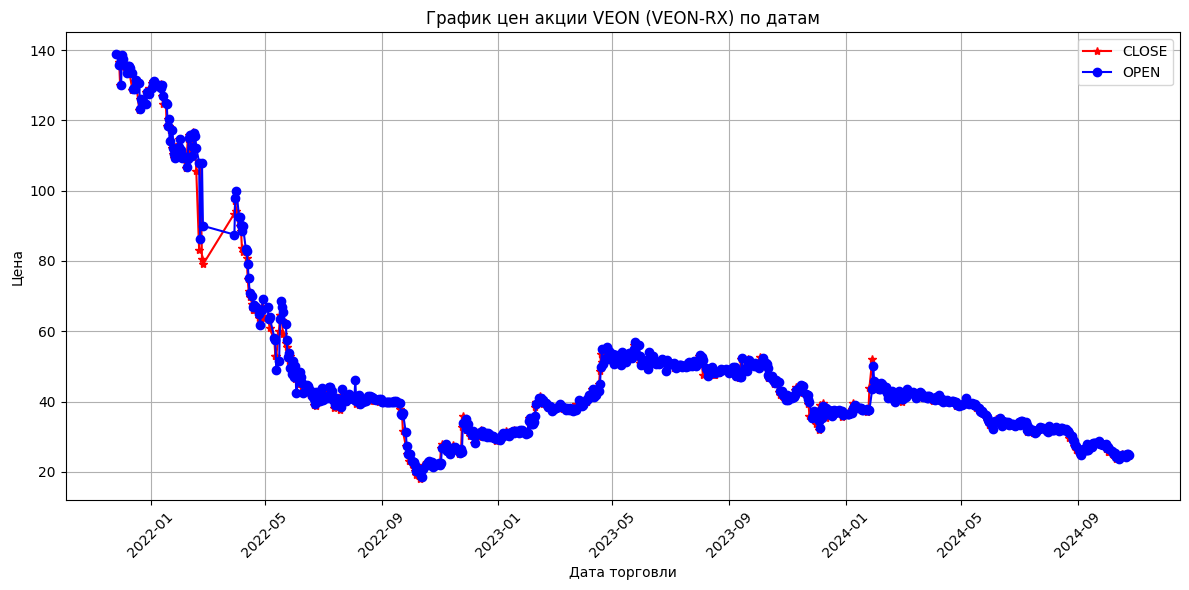

In [ ]:
import matplotlib.pyplot as plt

def plot_graph(name, secid, df, days_column='TRADEDATE', target_columns=['OPEN', 'LOW', 'HIGH', 'CLOSE']):
    options = {
        'OPEN':  { 'color': 'b', 'marker': 'o' },
        'LOW':   { 'color': 'y', 'marker': 'v' },
        'HIGH':  { 'color': 'g', 'marker': '^' },
        'CLOSE': { 'color': 'r', 'marker': '*' }
    }
    data = plt.figure(figsize=(12, 6))  # Установка размера графика
    flag = False

    # Построение графиков для каждой колонки
    for target_column in target_columns:
        if target_column in options.keys():
            flag = True
            plt_opt = options[target_column]
            plt.plot(df[days_column], df[target_column], label=target_column, marker=plt_opt['marker'], color=plt_opt['color'])
    if not flag:
        return

    # Настройка графика
    plt.title(f'График цен акции {name} ({secid}) по датам')
    plt.xlabel('Дата торговли')
    plt.ylabel('Цена')
    plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
    plt.legend()  # Отображение легенды
    plt.grid()  # Добавление сетки
    plt.tight_layout()  # Автоматическая настройка отступов

    # Показ графика
    plt.show()

plot_graph(name, secid, df, target_columns=['CLOSE', 'OPEN'])

Попытки дополнить пропуски в данных.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
def fill_missed(df):
    data_no_nan = df.dropna()
    for col in ['OPEN', 'LOW', 'HIGH', 'CLOSE']:
        # Признаки (временные метки)
        X = data_no_nan.index.values.reshape(-1, 1)
        y = data_no_nan[col].values

        model = RandomForestRegressor()
        model.fit(X, y)
        # обычно везде одинаковые пропущенные, но на всякий получаем индексы пропусков
        missing_indices = df[df[col].isnull()].index.values.reshape(-1, 1)

        # предсказываем
        predicted_values = model.predict(missing_indices)

        # заполняем пропуски
        df.loc[df[col].isnull(), col] = predicted_values
        # проверяем на качество (ни на что не влияет, просто как факт)
        test_data = data_no_nan.sample(frac=0.2, random_state=42)
        X_test = test_data.index.values.reshape(-1, 1)
        y_test = test_data[col].values

        predictions = model.predict(X_test)
        mae = mean_absolute_error(y_test, predictions)

        print(f'Средняя абсолютная ошибка {col}: {mae}')

In [ ]:
with open('data_frames.pkl', 'rb') as pickle_file:
    data_frames = pickle.load(pickle_file)

count = len(data_frames.keys())
index = 1
filled_data_frames = {}
for secid in data_frames.keys():
    print(f"{index}/{count} {secid}")
    index += 1
    with requests.Session() as session:
        data = apimoex.get_board_history(session, secid, columns= ['TRADEDATE', 'SHORTNAME', 'SECID', 'OPEN', 'LOW', 'HIGH', 'CLOSE'])
        df = pd.DataFrame(data)
        # проверка не нужна, ведь эти данные мы ранее находили и имеем в data_frames
        miss = df[df.isnull().any(axis=1) == True]
        print(f"{miss.shape[0] / df.shape[0] * 100:.2f}% пропусков ({miss.shape[0]} из {df.shape[0]})")
        if miss.shape[0] / df.shape[0] * 100 > 0.00001:
            # Если есть пропуски дозаполняем
            fill_missed(df)
            print(df.loc[miss.index])
            print(f'Пропусков: {len(df[df.isnull().any(axis=1) == True])}')
        row = df.iloc[0]
        # преобразуем в хэш, где ключом будет secid, а в его значении хэш с именем, данными, процентом и индексом пропусков и числом строк и пропусков
        filled_data_frames[row['SECID']] = {
            'short_name': row['SHORTNAME'],
            'data_frame': df.drop(['SHORTNAME', 'SECID'], axis=1),
            'miss_percent': miss.shape[0] / df.shape[0] * 100,
            'miss_count': miss.shape[0],
            'row_count': df.shape[0],
            'miss_index': miss.index
        }
        print(f"{row['SECID']} - {row['SHORTNAME']}")

Выходные данные были обрезаны до нескольких последних строк (5000).
MSST - МультиСис
145/331 MUGS
93.04% пропусков (1069 из 1149)
Средняя абсолютная ошибка OPEN: 0.029599137499999987
Средняя абсолютная ошибка LOW: 0.04066080000000004
Средняя абсолютная ошибка HIGH: 0.03367406249999997
Средняя абсолютная ошибка CLOSE: 0.038552625000000215
       TRADEDATE   SHORTNAME SECID      OPEN       LOW      HIGH     CLOSE
0     2014-06-09  МурмТЭЦ-ао  MUGS  0.095281  0.094233  0.098175  0.098072
1     2014-06-10  МурмТЭЦ-ао  MUGS  0.095281  0.094233  0.098175  0.098072
2     2014-06-11  МурмТЭЦ-ао  MUGS  0.095281  0.094233  0.098175  0.098072
3     2014-06-16  МурмТЭЦ-ао  MUGS  0.095281  0.094233  0.098175  0.098072
4     2014-06-17  МурмТЭЦ-ао  MUGS  0.095281  0.094233  0.098175  0.098072
...          ...         ...   ...       ...       ...       ...       ...
1143  2018-12-19  МурмТЭЦ-ао  MUGS  0.390460  0.363240  0.443200  0.383920
1144  2018-12-20  МурмТЭЦ-ао  MUGS  0.390460  0.363240  0.44

In [ ]:
import pickle

with open('filled_data_frames.pkl', 'rb') as pickle_file:
    filled_data_frames = pickle.load(pickle_file)

In [ ]:
for secid in ['GAZC', 'GTSS']:
    index += 1
    with requests.Session() as session:
        data = apimoex.get_board_history(session, secid, columns= ['TRADEDATE', 'SHORTNAME', 'SECID', 'OPEN', 'LOW', 'HIGH', 'CLOSE'])
        df = pd.DataFrame(data)
        # проверка не нужна, ведь эти данные мы ранее находили и имеем в data_frames
        print(df.loc[df[df.isnull().any(axis=1) == False].index])

       TRADEDATE  SHORTNAME SECID   OPEN    LOW   HIGH  CLOSE
134   2014-12-17  ГАЗКОН-ао  GAZC  293.0  292.0  293.0  292.0
173   2015-02-16  ГАЗКОН-ао  GAZC  293.0  293.0  293.0  293.0
1107  2018-10-29  ГАЗКОН-ао  GAZC  296.0  295.0  296.0  295.0
2135  2022-11-25  ГАЗКОН-ао  GAZC  328.0  328.0  328.0  328.0
2393  2023-11-30  ГАЗКОН-ао  GAZC  659.0  659.0  659.0  659.0
Empty DataFrame
Columns: [TRADEDATE, SHORTNAME, SECID, OPEN, LOW, HIGH, CLOSE]
Index: []


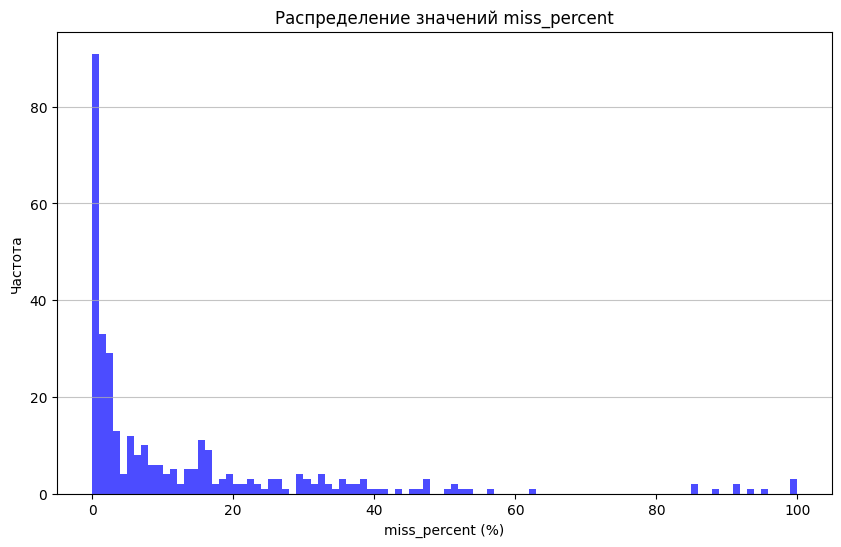

In [ ]:
miss_percents = [data['miss_percent'] for data in filled_data_frames.values()]
miss_df = pd.DataFrame(miss_percents, columns=['miss_percent'])
plt.figure(figsize=(10, 6))
plt.hist(miss_df['miss_percent'], bins=100, color='blue', alpha=0.7)
plt.title('Распределение значений miss_percent')
plt.xlabel('miss_percent (%)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

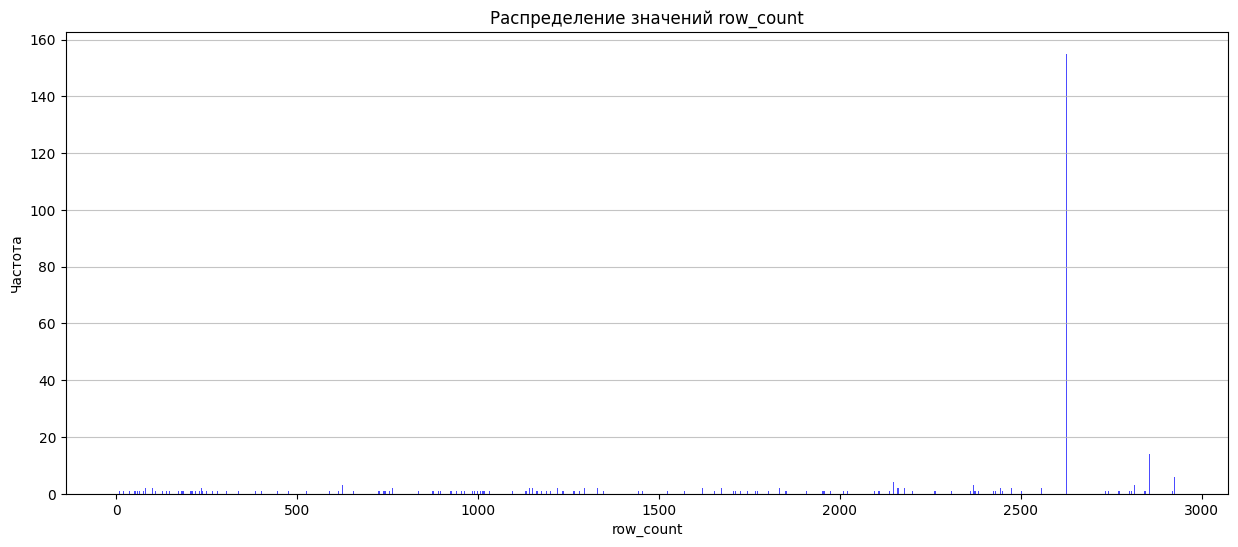

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# print(filled_data_frames.keys())
row_count = [data['row_count'] for data in filled_data_frames.values()]
rows_df = pd.DataFrame(row_count, columns=['row_count'])
plt.figure(figsize=(15, 6))
plt.hist(rows_df['row_count'], bins=1000, color='blue', alpha=0.7)
plt.title('Распределение значений row_count')
plt.xlabel('row_count')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

Почти у половины компаний было 2624 строк данных в памяти мосбиржы, притом, что они содержали пропуски

Пора добавить сохранение в S3

In [ ]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
import os

os.environ['AWS_ACCESS_KEY_ID'] = <access_key>
os.environ['AWS_SECRET_ACCESS_KEY'] = <secret_access_key>

In [ ]:
import boto3
import io
import json
from botocore.exceptions import ClientError, NoCredentialsError
import copy
import os
import traceback
from traceback import format_exc


BUCKET = 'shares-time-series'

access_key = os.getenv('AWS_ACCESS_KEY_ID')
secret_key = os.getenv('AWS_SECRET_ACCESS_KEY')
endpoint_url = 'https://storage.yandexcloud.net'

# Создание клиента S3
s3_client = boto3.client('s3',
                         region_name='ru-central1',
                         aws_access_key_id=access_key,
                         aws_secret_access_key=secret_key,
                         endpoint_url=endpoint_url)

def upload_object_to_s3(key, body):
    response = s3_client.put_object(Bucket=BUCKET, Key=key, Body=body)
    if response['ResponseMetadata']['HTTPStatusCode'] == 200:
        print(f"Успешно сохранен в {BUCKET}/{key}")
    else:
        print(f"Ошибка при сохранении: {response['ResponseMetadata']['HTTPStatusCode']}")

def upload_data_frame_to_s3(secid, data_frame, dir=''):
    pickle_buffer = io.BytesIO()
    data_frame.to_pickle(pickle_buffer)
    pickle_buffer.seek(0)
    data_frame_file = f'{secid}/{dir}{secid}_data_frame.pkl'
    upload_object_to_s3(data_frame_file, pickle_buffer)

def upload_info_to_s3(secid, info, dir=''):
    info['miss_index'] = info['miss_index'].to_numpy().tolist()
    json_data = json.dumps(info)
    info_file = f'{secid}/{dir}{secid}_info.pkl'
    upload_object_to_s3(info_file, json_data)

def upload_data_to_s3(dict_data, dir=''):
    for secid, data in dict_data.items():
        try:
            copy_data = copy.deepcopy(data)
            upload_data_frame_to_s3(secid, copy_data['data_frame'], dir)
            del copy_data['data_frame']
            upload_info_to_s3(secid, copy_data, dir)
        except ClientError as e:
            print(f"Произошла ошибка: {e.response['Error']['Message']}")
        except Exception as e:
            error_message = f"Неизвестная ошибка: {str(e)}"
            error_context = traceback.format_exc()
            print(f"{error_message}\nКонтекст ошибки:\n{error_context}")

def list_directories(s3_client):
    directories = set()
    try:
        paginator = s3_client.get_paginator('list_objects_v2')
        for page in paginator.paginate(Bucket=BUCKET, Delimiter='/'):
            for prefix in page.get('CommonPrefixes', []):
                directories.add(prefix.get('Prefix'))
    except NoCredentialsError:
        print("Ошибка: Неверные учетные данные.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")
    return directories

def download_object_from_s3(key):
    response = s3_client.get_object(Bucket=BUCKET, Key=key)
    if response['ResponseMetadata']['HTTPStatusCode'] == 200:
        print(f"Успешно получен из {BUCKET}/{key}")
    else:
        print(f"Ошибка при получении: {response['ResponseMetadata']['HTTPStatusCode']}")
    return response['Body'].read()

def download_info_from_s3(secid, dir=''):
    key = f'{secid}/{dir}{secid}_info.pkl'
    response = download_object_from_s3(key)
    data = json.loads(response)
    data['miss_index'] = pd.Index(np.array(data['miss_index']))
    return data

def download_data_frame_from_s3(secid, dir=''):
    key = f'{secid}/{dir}{secid}_data_frame.pkl'
    response = download_object_from_s3(key)
    buffer = io.BytesIO(response)
    data = pd.read_pickle(buffer)
    data['TRADEDATE'] = pd.to_datetime(data['TRADEDATE'])
    return data

def download_data_from_s3(secids=None, dir=''):
    directories = [dir[:-1] for dir in list_directories(s3_client)]
    data = {}
    for secid in directories:
        if secids is None or secid in secids:
            try:
                if secids is not None:
                    secids.remove(secid)
                data[secid] = download_info_from_s3(secid, dir)
                data[secid]['data_frame'] = download_data_frame_from_s3(secid, dir)
            except Exception as e:
                print(f"Произошла ошибка: {e}")
    if secids is not None and len(secids) > 0:
        print(f'Не нашли {secids}')
    return data

In [ ]:
upload_data_to_s3(filled_data_frames)

Успешно сохранен в shares-time-series/AVAZ/AVAZ_data_frame.pkl
Успешно сохранен в shares-time-series/AVAZ/AVAZ_info.pkl
Успешно сохранен в shares-time-series/AVAZP/AVAZP_data_frame.pkl
Успешно сохранен в shares-time-series/AVAZP/AVAZP_info.pkl
Успешно сохранен в shares-time-series/KLVZ/KLVZ_data_frame.pkl
Успешно сохранен в shares-time-series/KLVZ/KLVZ_info.pkl
Успешно сохранен в shares-time-series/ALRS/ALRS_data_frame.pkl
Успешно сохранен в shares-time-series/ALRS/ALRS_info.pkl
Успешно сохранен в shares-time-series/ALNU/ALNU_data_frame.pkl
Успешно сохранен в shares-time-series/ALNU/ALNU_info.pkl
Успешно сохранен в shares-time-series/APRI/APRI_data_frame.pkl
Успешно сохранен в shares-time-series/APRI/APRI_info.pkl
Успешно сохранен в shares-time-series/ACKO/ACKO_data_frame.pkl
Успешно сохранен в shares-time-series/ACKO/ACKO_info.pkl
Успешно сохранен в shares-time-series/ABRD/ABRD_data_frame.pkl
Успешно сохранен в shares-time-series/ABRD/ABRD_info.pkl
Успешно сохранен в shares-time-serie

In [ ]:
data = download_data_from_s3(['SBER', 'YAND', 'YDEX'])

Успешно получен из shares-time-series/SBER/SBER_info.pkl
Успешно получен из shares-time-series/SBER/SBER_data_frame.pkl
Успешно получен из shares-time-series/YDEX/YDEX_info.pkl
Успешно получен из shares-time-series/YDEX/YDEX_data_frame.pkl
Не нашли ['YAND']


In [ ]:
data

{'SBER': {'short_name': 'Сбербанк',
  'miss_percent': 0.6149641270925863,
  'miss_count': 18,
  'row_count': 2927,
  'miss_index': Index([2216, 2249, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261,
         2262, 2263, 2264, 2265, 2266, 2267],
        dtype='int64'),
  'data_frame':        TRADEDATE    OPEN     LOW    HIGH   CLOSE
  0     2013-03-25   96.00   96.00  101.14   98.79
  1     2013-03-26   98.58   97.08   99.31   97.20
  2     2013-03-27   97.90   95.39   98.00   96.75
  3     2013-03-28   96.38   95.72   98.66   98.59
  4     2013-03-29   98.60   98.32   99.09   98.76
  ...          ...     ...     ...     ...     ...
  2922  2024-10-21  257.30  256.78  259.85  258.21
  2923  2024-10-22  258.10  255.25  258.80  255.42
  2924  2024-10-23  255.10  251.34  255.90  252.01
  2925  2024-10-24  252.01  250.25  254.27  252.64
  2926  2024-10-25  252.72  245.70  255.35  246.35
  
  [2927 rows x 5 columns]},
 'YDEX': {'short_name': 'ЯНДЕКС',
  'miss_percent': 15.0,
  'mi

Начальные пропуски не выглядят как полезная информация, которую можно как-то правильно заполнить, поэтому обработаем данные и удалим их, сохраняя в s3.

In [ ]:
import numpy as np

with open('filled_data_frames.pkl', 'rb') as pickle_file:
    filled_data_frames = pickle.load(pickle_file)

filled_data_frames_before = copy.deepcopy(filled_data_frames)
filled_data_frames_after = copy.deepcopy(filled_data_frames)

def find_first_normal_index(data, secid):
    full_index = np.arange(0, data['data_frame'].shape[0] + 1)
    missing_values = np.setdiff1d(full_index, data['miss_index'])
    return missing_values[0]

for secid, data in filled_data_frames_after.items():
    first_not_missed = find_first_normal_index(data, secid)
    if first_not_missed != 0:
        data['data_frame'] = data['data_frame'].iloc[first_not_missed:]
        data['data_frame'].reset_index(drop=True, inplace=True)
        data['miss_index'] = data['miss_index'][data['miss_index'] >= first_not_missed] - first_not_missed
        data['miss_count'] = int(data['miss_count'] - first_not_missed)
        data['row_count'] = int(data['row_count'] - first_not_missed)
        data['miss_percent'] = float(data['miss_count'] / data['row_count'] * 100)

upload_data_to_s3(filled_data_frames_after, 'normal_start/')

Успешно сохранен в shares-time-series/AVAZ/normal_start/AVAZ_data_frame.pkl
Успешно сохранен в shares-time-series/AVAZ/normal_start/AVAZ_info.pkl
Успешно сохранен в shares-time-series/AVAZP/normal_start/AVAZP_data_frame.pkl
Успешно сохранен в shares-time-series/AVAZP/normal_start/AVAZP_info.pkl
Успешно сохранен в shares-time-series/KLVZ/normal_start/KLVZ_data_frame.pkl
Успешно сохранен в shares-time-series/KLVZ/normal_start/KLVZ_info.pkl
Успешно сохранен в shares-time-series/ALRS/normal_start/ALRS_data_frame.pkl
Успешно сохранен в shares-time-series/ALRS/normal_start/ALRS_info.pkl
Успешно сохранен в shares-time-series/ALNU/normal_start/ALNU_data_frame.pkl
Успешно сохранен в shares-time-series/ALNU/normal_start/ALNU_info.pkl
Успешно сохранен в shares-time-series/APRI/normal_start/APRI_data_frame.pkl
Успешно сохранен в shares-time-series/APRI/normal_start/APRI_info.pkl
Успешно сохранен в shares-time-series/ACKO/normal_start/ACKO_data_frame.pkl
Успешно сохранен в shares-time-series/ACKO/n

Давайте сравним графики данных до удаления начальных пропусков и после.

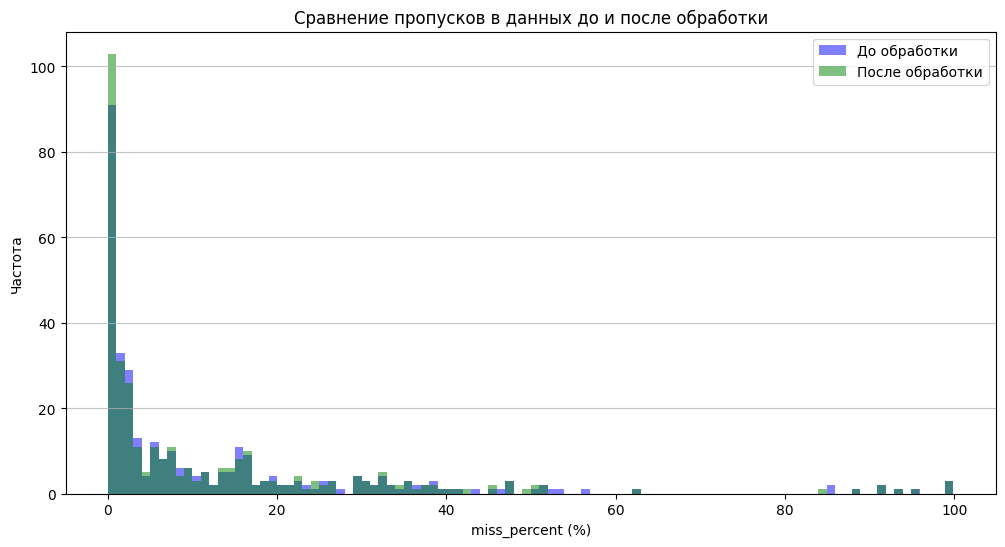

In [ ]:
miss_percents_before = [data['miss_percent'] for data in filled_data_frames_before.values()]
miss_percents_after = [data['miss_percent'] for data in filled_data_frames_after.values()]

miss_df_before = pd.DataFrame(miss_percents_before, columns=['miss_percent'])
miss_df_after = pd.DataFrame(miss_percents_after, columns=['miss_percent'])

plt.figure(figsize=(12, 6))
plt.hist(miss_df_before['miss_percent'], bins=100, color='blue', alpha=0.5, label='До обработки')
plt.hist(miss_df_after['miss_percent'], bins=100, color='green', alpha=0.5, label='После обработки')

plt.title('Сравнение пропусков в данных до и после обработки')
plt.xlabel('miss_percent (%)')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

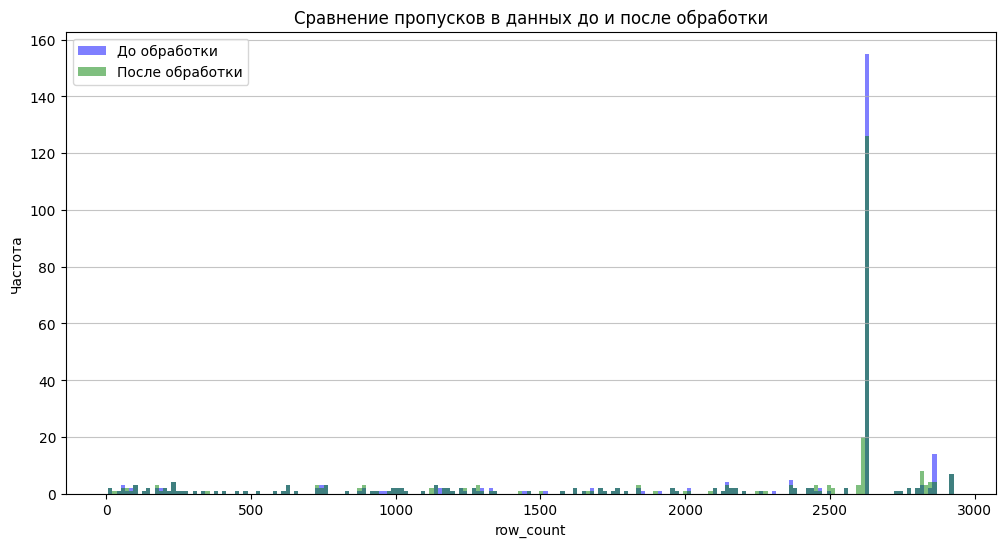

In [ ]:
row_counts_before = [data['row_count'] for data in filled_data_frames_before.values()]
row_counts_after = [data['row_count'] for data in filled_data_frames_after.values()]

row_df_before = pd.DataFrame(row_counts_before, columns=['row_count'])
row_df_after = pd.DataFrame(row_counts_after, columns=['row_count'])

plt.figure(figsize=(12, 6))
plt.hist(row_df_before['row_count'], bins=200, color='blue', alpha=0.5, label='До обработки')
plt.hist(row_df_after['row_count'], bins=200, color='green', alpha=0.5, label='После обработки')

plt.title('Сравнение пропусков в данных до и после обработки')
plt.xlabel('row_count')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

Можно заметить, что ситуация хоть и незначительнее, но стала лучше, посмотрим на разницу процентов пропусков.

In [ ]:
diffs = [item for item in miss_df_before['miss_percent'] - miss_df_after['miss_percent'] if item > 0.00001]
print(f"Средний процент пропусков до: {miss_df_before['miss_percent'].mean()}")
print(f"Средний проуент пропусков после: {miss_df_after['miss_percent'].mean()}")
print(f'Минимальное улучшение: {min(diffs)}%, Самое удачное: {max(diffs)}%')

Средний процент пропусков до: 12.879085905787692
Средний проуент пропусков после: 12.228946842696304
Минимальное улучшение: 0.00806975251515496%, Самое удачное: 84.40332507585359%


Можно заметить как изменилось среднее число поисков, изменения не колоссальные. Но так же видно минимальное и максимальное изменение процентов пропусков. Как видим есть данные, которые содержали тысячи отметок и с одним или несколькими пропусками в начале, но были и те, у которых удалось убрать почти 85% пропусков таким простым действием.

Надо улучшить график для предсказаний с вертикальной и доп графиком именно для предсказаний.

In [ ]:
import pandas as pd
import numpy as np

df = download_data_from_s3(dir='normal_start/')

Успешно получен из shares-time-series/KCHEP/normal_start/KCHEP_info.pkl
Успешно получен из shares-time-series/KCHEP/normal_start/KCHEP_data_frame.pkl
Успешно получен из shares-time-series/SARE/normal_start/SARE_info.pkl
Успешно получен из shares-time-series/SARE/normal_start/SARE_data_frame.pkl
Успешно получен из shares-time-series/NNSB/normal_start/NNSB_info.pkl
Успешно получен из shares-time-series/NNSB/normal_start/NNSB_data_frame.pkl
Успешно получен из shares-time-series/GTRK/normal_start/GTRK_info.pkl
Успешно получен из shares-time-series/GTRK/normal_start/GTRK_data_frame.pkl
Успешно получен из shares-time-series/POGR/normal_start/POGR_info.pkl
Успешно получен из shares-time-series/POGR/normal_start/POGR_data_frame.pkl
Успешно получен из shares-time-series/ASSB/normal_start/ASSB_info.pkl
Успешно получен из shares-time-series/ASSB/normal_start/ASSB_data_frame.pkl
Успешно получен из shares-time-series/SAREP/normal_start/SAREP_info.pkl
Успешно получен из shares-time-series/SAREP/norm

In [ ]:
df['SBER']['data_frame'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TRADEDATE  2927 non-null   datetime64[ns]
 1   OPEN       2927 non-null   float64       
 2   LOW        2927 non-null   float64       
 3   HIGH       2927 non-null   float64       
 4   CLOSE      2927 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 114.5 KB


In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.dates as mdates

def is_valid_prediction_line(prediction_line):
    try:
        # Пытаемся преобразовать строку в объект даты
        datetime.strptime(prediction_line, '%Y-%m-%d')
        return True  # Если преобразование прошло успешно, возвращаем True
    except ValueError:
        return False

def plot_graph(data_frame, secids=['SBER'], days_column='TRADEDATE', target_columns=['OPEN', 'LOW', 'HIGH', 'CLOSE'], prediction_line=None, prediction_data_frame=None):
    if prediction_data_frame is not None and prediction_line is None:
        return print('С предсказаниями должна быть линия начала предсказаний')
    if prediction_line is not None and not isinstance(prediction_line, datetime):
        return print("prediction_line не является объектом datetime.")
    options = {
        'OPEN':  { 'color': 'b', 'marker': 'o' },
        'LOW':   { 'color': 'y', 'marker': 'v' },
        'HIGH':  { 'color': 'g', 'marker': '^' },
        'CLOSE': { 'color': 'r', 'marker': '*' }
    }
    if len(list(set(options) & set(target_columns))) == 0:
        return print(f'Нет ни одного столбца, что можем отобразить. Твои: {target_columns}. Наши: {options.keys()}')
    prediction_options = {
        'OPEN':  { 'color': 'mediumseagreen', 'marker': '+' },
        'LOW':   { 'color': 'm', 'marker': 'x' },
        'HIGH':  { 'color': 'aquamarine', 'marker': 's' },
        'CLOSE': { 'color': 'c', 'marker': 'd' }
    }
    for secid in secids:
        data = plt.figure(figsize=(12, 6))  # Установка размера графика

        plot_df = data_frame[secid]['data_frame']
        prediction_count = plot_df[plot_df[days_column] > prediction_line].shape[0]
        # Построение графиков для каждой колонки
        for target_column in target_columns:
            if target_column in options.keys():
                plt_opt = options[target_column]
                plt.plot(plot_df[days_column], plot_df[target_column], label=target_column, marker=plt_opt['marker'], color=plt_opt['color'])
                if prediction_line is not None and prediction_data_frame is not None:
                    plt_pred_opt = prediction_options[target_column]
                    # prediction_plot_df = prediction_data_frame[secid]['data_frame']
                    prediction_plot_df = prediction_data_frame
                    plt.axvline(x=prediction_line, color='black', linestyle='--', label='Начало предсказаний')
                    plt.plot(plot_df[days_column].tail(prediction_count), prediction_plot_df.tail(prediction_count), label=f'prediction_{target_column}', marker=plt_pred_opt['marker'], color=plt_pred_opt['color'])

        # Настройка графика
        plt.title(f"График цен акции {data_frame[secid]['short_name']} ({secid}) по датам")
        plt.xlabel('Дата торговли')
        plt.ylabel('Цена')
        plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
        period = int(plot_df.shape[0] / 10)
        plt.gca().set_xticks(plot_df[days_column][::period])  # Устанавливаем метки через один
        plt.gca().set_xticklabels(plot_df[days_column][::period].dt.strftime('%Y-%m-%d'), rotation=45)  # Поворот меток по оси X для лучшей читаемости
        plt.legend()  # Отображение легенды
        plt.grid()  # Добавление сетки
        plt.tight_layout()  # Автоматическая настройка отступов
        plt.show()

        # второй график для отображения только предсказаний
        data = plt.figure(figsize=(12, 6))
        prediction_count = plot_df[plot_df[days_column] > prediction_line].shape[0]
        for target_column in target_columns:
            if target_column in options.keys():
                plt_opt = options[target_column]
                plt.plot(plot_df[days_column].tail(prediction_count), plot_df[target_column].tail(prediction_count), label=target_column, marker=plt_opt['marker'], color=plt_opt['color'])
                if prediction_line is not None and prediction_data_frame is not None:
                    plt_pred_opt = prediction_options[target_column]
                    # prediction_plot_df = prediction_data_frame[secid]['data_frame']
                    prediction_plot_df = prediction_data_frame
                    plt.axvline(x=prediction_line, color='black', linestyle='--', label='Начало предсказаний')
                    plt.plot(plot_df[days_column].tail(prediction_count), prediction_plot_df.tail(prediction_count), label=f'prediction_{target_column}', marker=plt_pred_opt['marker'], color=plt_pred_opt['color'])

        # Настройка графика
        plt.title(f"График цен акции {data_frame[secid]['short_name']} ({secid}) по датам для предсказаний")
        plt.xlabel('Дата торговли')
        plt.ylabel('Цена')
        plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
        period = int(prediction_count / 10)
        plt.gca().set_xticks(plot_df[days_column].tail(prediction_count)[::period])  # Устанавливаем метки через один
        plt.gca().set_xticklabels(plot_df[days_column].tail(prediction_count)[::period].dt.strftime('%Y-%m-%d'), rotation=45)  # Поворот меток по оси X для лучшей читаемости
        plt.legend()  # Отображение легенды
        plt.grid()  # Добавление сетки
        plt.tight_layout()  # Автоматическая настройка отступов
        plt.show()

# prediction_strat_date = datetime.strptime((datetime.now() - relativedelta(months=1)).strftime("%Y-%m-%d"), "%Y-%m-%d")
# plot_graph(df, secids=['SBER', 'YDEX'], target_columns=['OPEN'])

Обучение и предсказание

RMSE = 71.1463208057715
2024-10-02 00:00:00


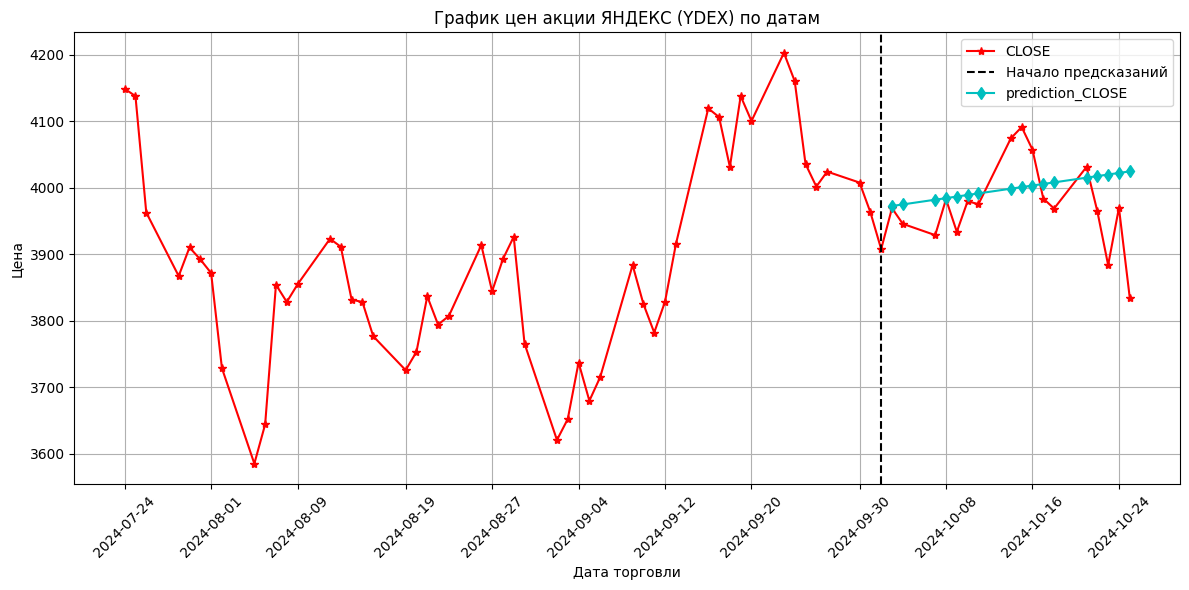

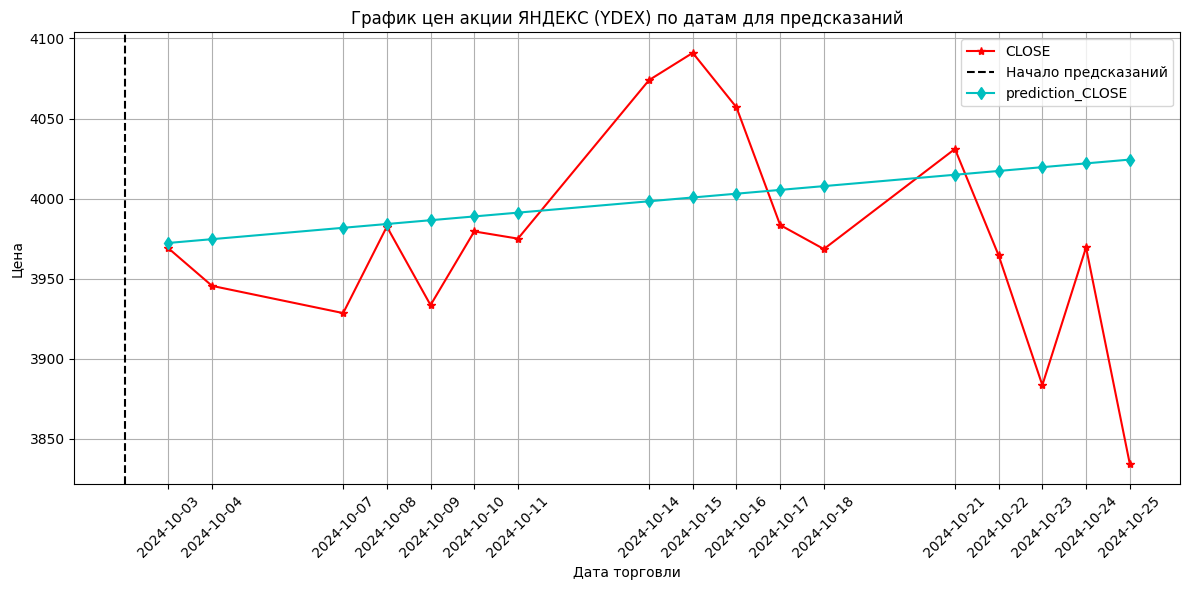

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import math

data = df['YDEX']['data_frame']
shape = data.shape[0]
train_data = data.iloc[:math.ceil(shape*0.75)]
val_data = data.iloc[math.ceil(shape*0.75):]
train = train_data.reset_index(drop=True)
val = val_data.reset_index(drop=True)
X_train = (train['TRADEDATE'] - train_data['TRADEDATE'][0]).apply(str).str.replace(' days 00:00:00', '', regex=False)
y_train = train['CLOSE']
X_val = (val['TRADEDATE'] - train_data['TRADEDATE'][0]).apply(str).str.replace(' days 00:00:00', '', regex=False)
y_val = val['CLOSE']

model = LinearRegression()
model.fit(np.array(X_train).reshape(-1, 1), y_train)
preds = model.predict(np.array(X_val).reshape(-1, 1))
rmse = np.sqrt(np.mean((y_val - preds) ** 2))
print(f'RMSE = {rmse}')

plot_graph(df, secids=['YDEX'], target_columns=['CLOSE'], prediction_line=train['TRADEDATE'].iloc[-1], prediction_data_frame=pd.Series(preds))

In [ ]:
import os

os.environ['AWS_ACCESS_KEY_ID'] = <access_key>
os.environ['AWS_SECRET_ACCESS_KEY'] = <secret_access_key>

In [ ]:
!pip install boto3
import boto3
import io
import json
from botocore.exceptions import ClientError, NoCredentialsError
import copy
import os
import traceback
from traceback import format_exc
import pandas as pd
import numpy as np


BUCKET = 'shares-time-series'

access_key = os.getenv('AWS_ACCESS_KEY_ID')
secret_key = os.getenv('AWS_SECRET_ACCESS_KEY')
endpoint_url = 'https://storage.yandexcloud.net'

# Создание клиента S3
s3_client = boto3.client('s3',
                         region_name='ru-central1',
                         aws_access_key_id=access_key,
                         aws_secret_access_key=secret_key,
                         endpoint_url=endpoint_url)

def upload_object_to_s3(key, body):
    response = s3_client.put_object(Bucket=BUCKET, Key=key, Body=body)
    if response['ResponseMetadata']['HTTPStatusCode'] == 200:
        print(f"Успешно сохранен в {BUCKET}/{key}")
    else:
        print(f"Ошибка при сохранении: {response['ResponseMetadata']['HTTPStatusCode']}")

def upload_data_frame_to_s3(secid, data_frame, dir=''):
    pickle_buffer = io.BytesIO()
    data_frame.to_pickle(pickle_buffer)
    pickle_buffer.seek(0)
    data_frame_file = f'{secid}/{dir}{secid}_data_frame.pkl'
    upload_object_to_s3(data_frame_file, pickle_buffer)

def upload_info_to_s3(secid, info, dir=''):
    info['miss_index'] = info['miss_index'].to_numpy().tolist()
    json_data = json.dumps(info)
    info_file = f'{secid}/{dir}{secid}_info.pkl'
    upload_object_to_s3(info_file, json_data)

def upload_data_to_s3(dict_data, dir=''):
    for secid, data in dict_data.items():
        try:
            copy_data = copy.deepcopy(data)
            upload_data_frame_to_s3(secid, copy_data['data_frame'], dir)
            del copy_data['data_frame']
            upload_info_to_s3(secid, copy_data, dir)
        except ClientError as e:
            print(f"Произошла ошибка: {e.response['Error']['Message']}")
        except Exception as e:
            error_message = f"Неизвестная ошибка: {str(e)}"
            error_context = traceback.format_exc()
            print(f"{error_message}\nКонтекст ошибки:\n{error_context}")

def list_directories(s3_client):
    directories = set()
    try:
        paginator = s3_client.get_paginator('list_objects_v2')
        for page in paginator.paginate(Bucket=BUCKET, Delimiter='/'):
            for prefix in page.get('CommonPrefixes', []):
                directories.add(prefix.get('Prefix'))
    except NoCredentialsError:
        print("Ошибка: Неверные учетные данные.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")
    return directories

def download_object_from_s3(key):
    response = s3_client.get_object(Bucket=BUCKET, Key=key)
    if response['ResponseMetadata']['HTTPStatusCode'] == 200:
        print(f"Успешно получен из {BUCKET}/{key}")
    else:
        print(f"Ошибка при получении: {response['ResponseMetadata']['HTTPStatusCode']}")
    return response['Body'].read()

def download_info_from_s3(secid, dir=''):
    key = f'{secid}/{dir}{secid}_info.pkl'
    response = download_object_from_s3(key)
    data = json.loads(response)
    data['miss_index'] = pd.Index(np.array(data['miss_index']))
    return data

def download_data_frame_from_s3(secid, dir=''):
    key = f'{secid}/{dir}{secid}_data_frame.pkl'
    response = download_object_from_s3(key)
    buffer = io.BytesIO(response)
    data = pd.read_pickle(buffer)
    data['TRADEDATE'] = pd.to_datetime(data['TRADEDATE'])
    return data

def download_data_from_s3(secids=None, dir=''):
    directories = [dir[:-1] for dir in list_directories(s3_client)]
    data = {}
    for secid in directories:
        if secids is None or secid in secids:
            try:
                if secids is not None:
                    secids.remove(secid)
                data[secid] = download_info_from_s3(secid, dir)
                data[secid]['data_frame'] = download_data_frame_from_s3(secid, dir)
            except Exception as e:
                print(f"Произошла ошибка: {e}")
    if secids is not None and len(secids) > 0:
        print(f'Не нашли {secids}')
    return data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 7.2 MB/s eta 0:00:00


In [ ]:
df = download_data_from_s3(secids=['SBER', 'YDEX'], dir='normal_start/')

Успешно получен из shares-time-series/YDEX/normal_start/YDEX_info.pkl
Успешно получен из shares-time-series/YDEX/normal_start/YDEX_data_frame.pkl
Успешно получен из shares-time-series/SBER/normal_start/SBER_info.pkl
Успешно получен из shares-time-series/SBER/normal_start/SBER_data_frame.pkl


In [ ]:
!pip install sktime
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline
from sktime.utils.plotting import plot_series

In [ ]:
data = df['SBER']['data_frame'][['TRADEDATE', 'CLOSE']]
data

,TRADEDATE,CLOSE
0,2013-03-25,98.79
1,2013-03-26,97.20
2,2013-03-27,96.75
3,2013-03-28,98.59
4,2013-03-29,98.76
...,...,...
2922,2024-10-21,258.21
2923,2024-10-22,255.42
2924,2024-10-23,252.01
2925,2024-10-24,252.64


<Figure size 1500x600 with 0 Axes>

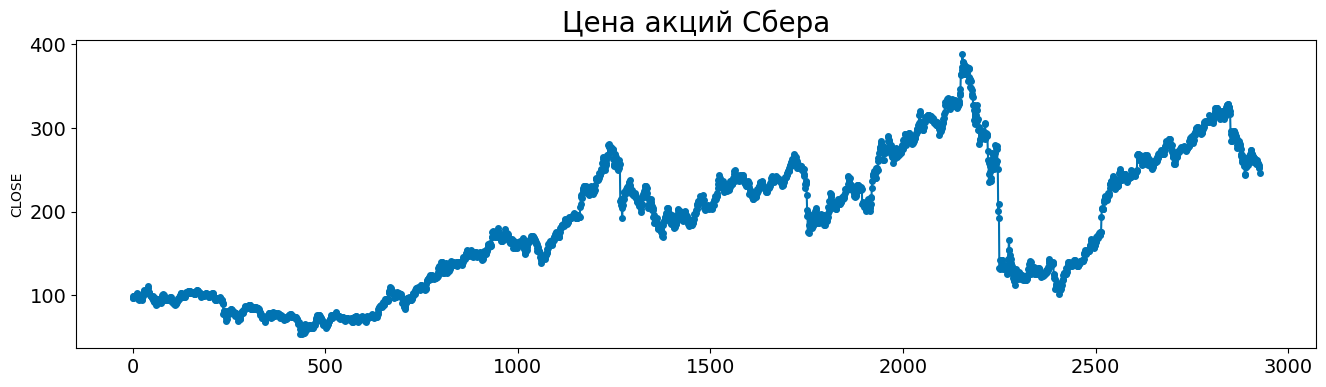

In [ ]:
plt.figure(figsize=(15,6))
y = data['CLOSE']
plot_series(y)
plt.title('Цена акций Сбера', fontsize=20, color='black')
plt.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
def mape(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

2678 249


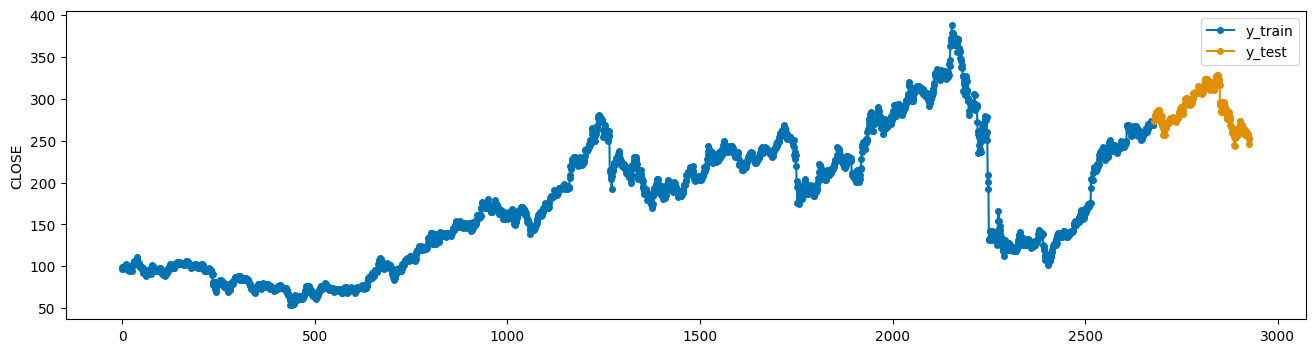

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split

# один год ~365 в месяце около 20 дней рабочих, поэтому
days = int(365 / 30 * 20.5)
y_train, y_test = temporal_train_test_split(y, test_size=days)
plot_series(y_train, y_test, labels=['y_train', 'y_test'])
print(y_train.shape[0], y_test.shape[0])

In [ ]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon([2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687,
       ...
       2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926],
      dtype='int64', length=249, is_relative=False)

8.287832195692724

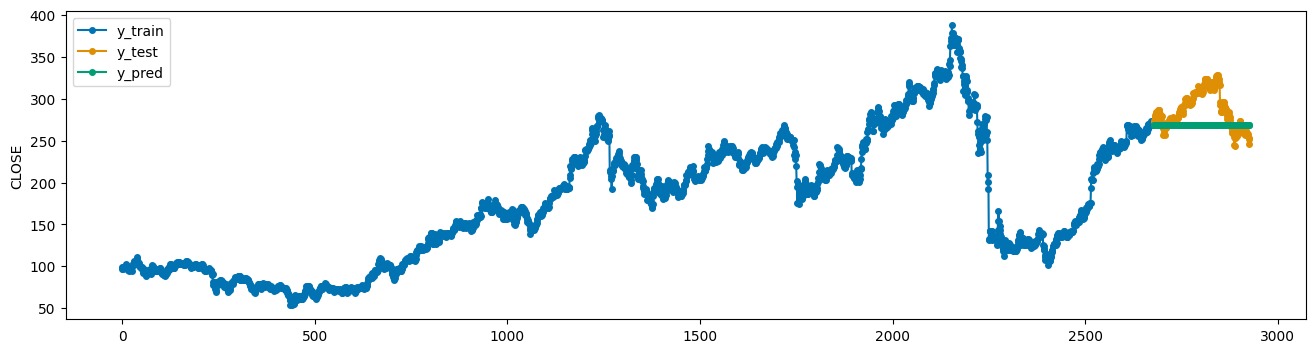

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy='last')
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
mape(y_pred, y_test)

9.882627587048193

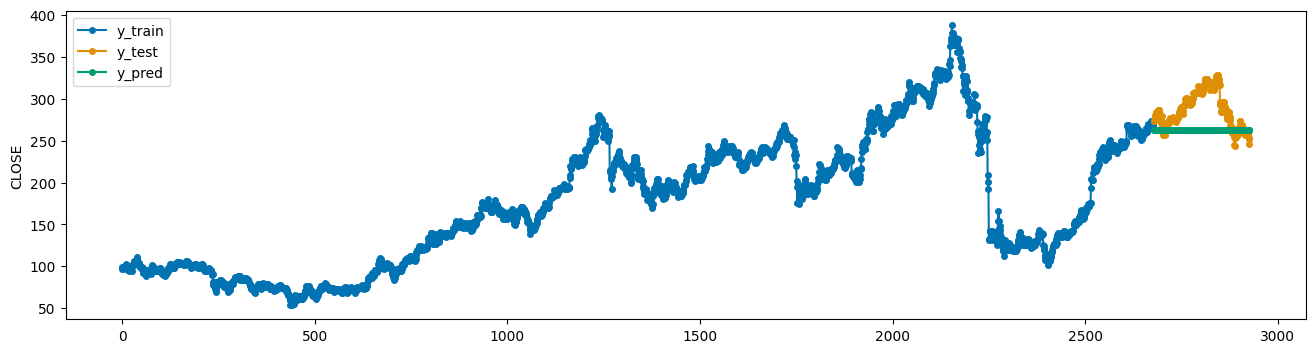

In [ ]:
forecaster = NaiveForecaster(strategy='mean', window_length=40)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
mape(y_pred, y_test)

63.766910541181986

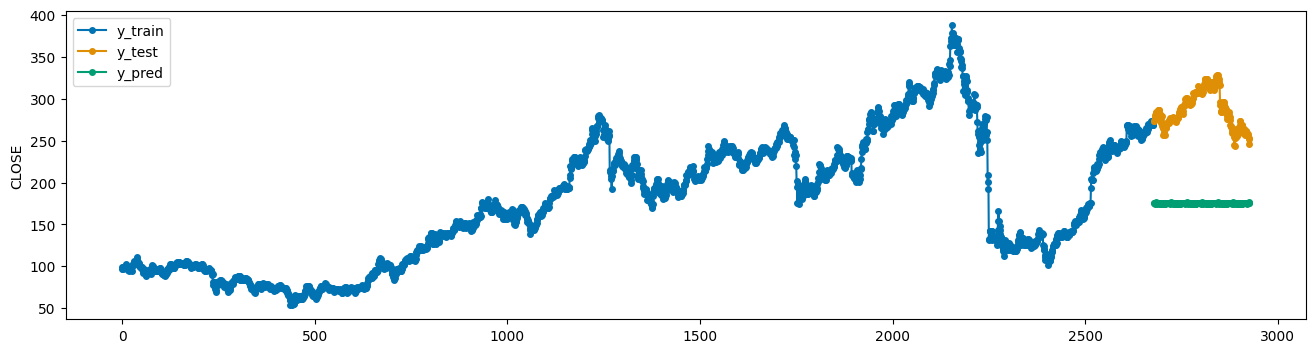

In [ ]:
forecaster = NaiveForecaster(strategy='mean', sp=40)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
mape(y_pred, y_test)

7.306652593338997

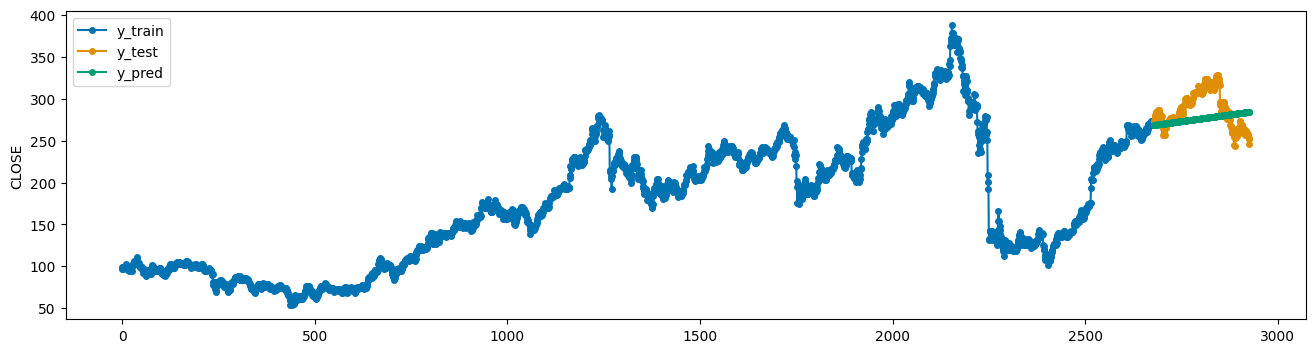

In [ ]:
forecaster = NaiveForecaster(strategy='drift')
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
mape(y_pred, y_test)

43.04641599937265

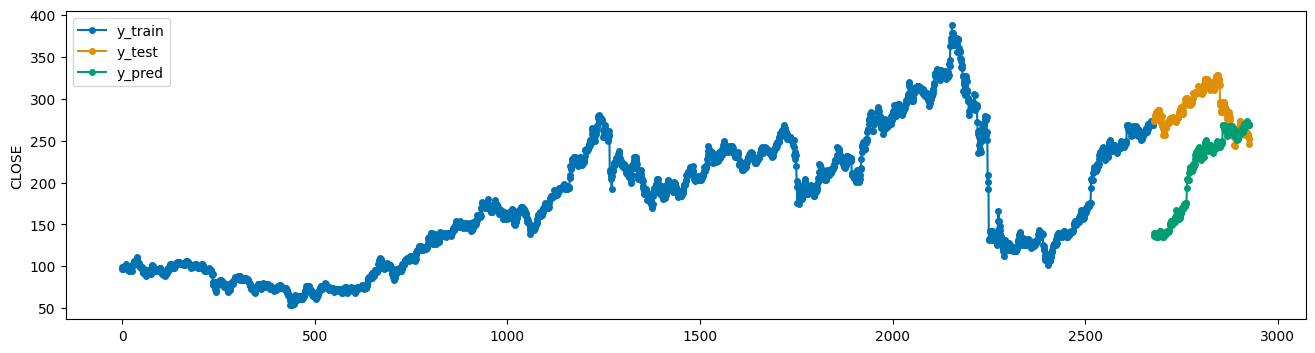

In [ ]:
forecaster = NaiveForecaster(strategy='last', sp=days)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
mape(y_pred, y_test)

8.287832193935529

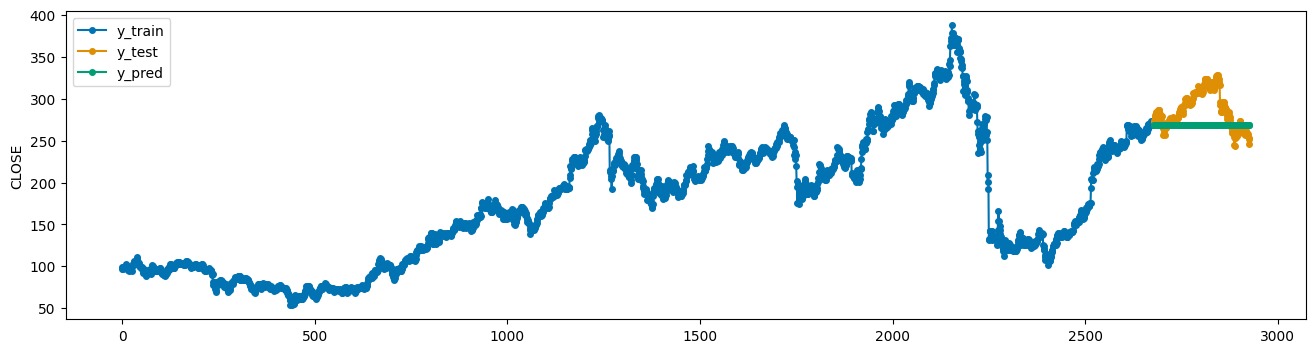

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

forecaster = ExponentialSmoothing()
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
mape(y_pred, y_test)

In [ ]:
forecaster.get_fitted_params()

{'initial_level': 98.79009231891425,
 'initial_slope': None,
 'initial_seasons': array([], dtype=float64),
 'aic': 7378.22989910639,
 'bic': 7390.015550158892,
 'aicc': 7378.244863565798}

9.221434484376038

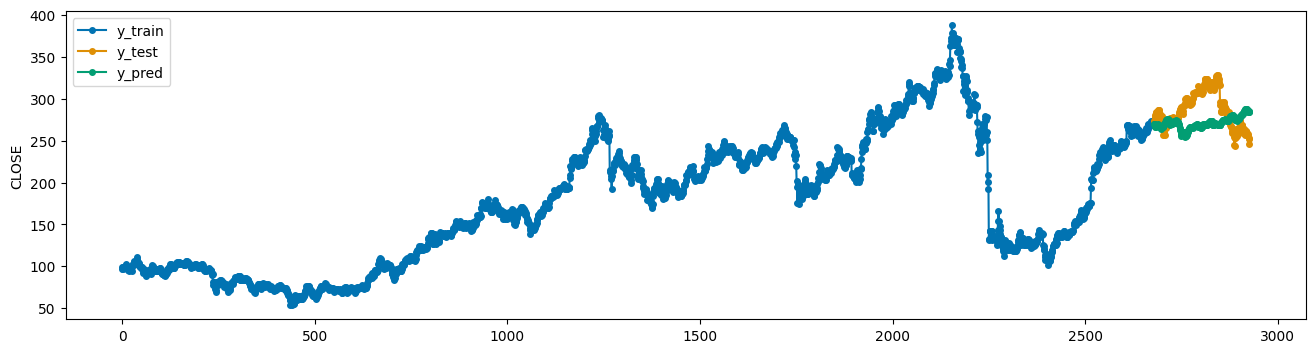

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

forecaster = ExponentialSmoothing(trend='add', seasonal='add', sp=days)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
mape(y_pred, y_test)

In [ ]:
forecaster.get_fitted_params()

{'initial_level': 92.19600896264961,
 'initial_slope': None,
 'initial_seasons': array([ 6.42007584e+00,  4.87272602e+00,  5.51807392e+00,  4.23128678e+00,
         2.58553989e+00,  1.60685632e+00, -2.56992660e+00, -3.04293185e+00,
        -4.69411707e+00, -1.00116767e+01, -1.24543810e+01, -9.27183560e+00,
        -8.93348096e+00, -9.93281328e+00, -1.06811946e+01, -1.06525917e+01,
        -9.24537715e+00, -9.14230917e+00, -8.06845286e+00, -8.53269821e+00,
        -9.74852004e+00, -1.39335074e+01, -1.32088054e+01, -1.31265062e+01,
        -1.28433615e+01, -1.17313522e+01, -1.08875267e+01, -8.23069366e+00,
        -6.56314259e+00, -7.96555621e+00, -5.67704380e+00, -3.91861218e+00,
        -3.99233435e+00, -2.96804062e+00, -2.56500606e+00, -3.18508878e+00,
        -3.92089312e+00, -3.02461177e+00, -3.31096234e+00, -3.57993889e+00,
        -3.84021461e+00, -2.93639225e+00, -4.44449105e+00, -2.38235995e+00,
        -1.84833894e+00, -2.35405837e+00, -2.23035104e+00, -1.93424483e+00,
        

8.28782040196695

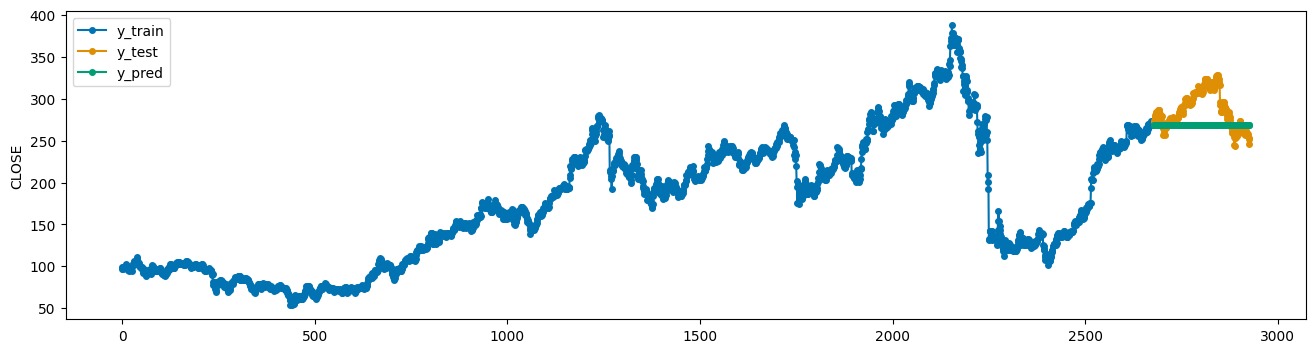

In [ ]:
from sktime.forecasting.ets import AutoETS

forecaster = AutoETS(auto=True, n_jobs=-1, information_criterion='bic')
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
mape(y_pred, y_test)

In [ ]:
import statsmodels.api as sm
ets_aaa = sm.tsa.statespace.ExponentialSmoothing(y_train, trend=True, seasonal=days)
ets_aaa_res = ets_aaa.fit()
print(ets_aaa_res.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
h = days
df_forecast = ets_aaa_res.get_forecast(h).summary_frame()
df_forecast.index = fh
df_forecast.head()

In [ ]:
dig, ax = plot_series(y_train, y_test, df_forecast['mean'], labels=['y_train', 'y_test'])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    df_forecast['mean_ci_lower'],
    df_forecast['mean_ci_upper'],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f'95% prediction intervals'
)
ax.legend(loc='lower left')

ValueError: There must be one label for each time series,
                but found inconsistent numbers of series and
                labels.

In [ ]:
mape(y_test, df_forecast['mean'])

In [ ]:
ets_aaa_res.plot_diagnostics(figsize=(10, 8));

In [ ]:
!pip install stocker
!pip install pandas numpy matplotlib statsmodels

In [ ]:
!pip install moexalgo

In [ ]:
from moexalgo import Market

stocks = Market("shares/TQBR")
all_stocks = stocks.tickers()

In [ ]:
all_stocks

,ticker,shortname,lotsize,decimals,minstep,issuesize,isin,regnumber,listlevel
0,ABIO,iАРТГЕН ао,10,2,0.020,92645451,RU000A0JNAB6,1-01-08902-A,2
1,ABRD,АбрауДюрсо,10,1,0.200,98000184,RU000A0JS5T7,1-02-12500-A,3
2,ACKO,АСКО ао,100,2,0.020,536000000,RU000A0JXS91,1-01-52065-Z,3
3,AFKS,Система ао,100,3,0.001,9650000000,RU000A0DQZE3,1-05-01669-A,1
4,AFLT,Аэрофлот,10,2,0.010,3975771215,RU0009062285,1-01-00010-A,1
...,...,...,...,...,...,...,...,...,...
248,YRSB,ТНСэнЯр,10,0,2.000,17143584,RU000A0D8760,1-01-50099-A,3
249,YRSBP,ТНСэнЯр-п,10,1,0.500,4507320,RU000A0D88B3,2-01-50099-A,3
250,ZAYM,Займер ао,10,2,0.050,100000000,RU000A107RM8,1-01-16767-A,3
251,ZILL,ЗИЛ ао,1,0,5.000,2659962,RU0009086193,1-02-00036-A,3


In [ ]:
import pandas as pd
stocks = Market("stocks")
all_stocks = pd.DataFrame(stocks.tickers())
print(all_stocks.columns.tolist())
listlevels = sorted(all_stocks["listlevel"].unique())
with open("stock_listing.txt", "w", encoding="utf-8") as file:
    print(f"Всего в Алгопаке доступны данные по {all_stocks.shape[0]} акциям Мосбиржи")
    print(
        f"Всего в Алгопаке доступны данные по {all_stocks.shape[0]} акциям Мосбиржи",
        file=file,
    )
    for level in listlevels:
        stocks_level = all_stocks[all_stocks["listlevel"] == level]
        print(f"Для {level} уровня листинга отобрано {stocks_level.shape[0]} акций:")
        print(
            f"Для {level} уровня листинга отобрано {stocks_level.shape[0]} акций:",
            file=file,
        )
        list_tickers = stocks_level["ticker"].tolist()
        list_shortnames = stocks_level["shortname"].tolist()
        for ticker, shortname in zip(list_tickers, list_shortnames):
            print(f"{ticker} - {shortname}")
            print(f"{ticker} - {shortname}", file=file)
        print("_" * 70)
        print("_" * 70, file=file)

['ticker', 'shortname', 'lotsize', 'decimals', 'minstep', 'issuesize', 'isin', 'regnumber', 'listlevel']
Всего в Алгопаке доступны данные по 253 акциям Мосбиржи
Для 1 уровня листинга отобрано 70 акций:
AFKS - Система ао
AFLT - Аэрофлот
AGRO - AGRO-гдр
ALRS - АЛРОСА ао
AQUA - ИНАРКТИКА
ASTR - Астра ао
BELU - НоваБев ао
BSPB - БСП ао
CBOM - МКБ ао
CHMF - СевСт-ао
CIAN - CIAN-адр
ELFV - ЭЛ5Энер ао
ENPG - ЭН+ГРУП ао
ETLN - ETLN-гдр
EUTR - ЕвроТранс
FEES - Россети
FIVE - FIVE-гдр
FIXP - FIXP-гдр
FLOT - Совкомфлот
GAZP - ГАЗПРОМ ао
GEMC - МКПАО ЮМГ
GLTR - GLTR-гдр
GMKN - ГМКНорНик
HEAD - Хэдхантер
HYDR - РусГидро
IRAO - ИнтерРАОао
LEAS - Европлан
LENT - Лента ао
LKOH - ЛУКОЙЛ
LSRG - ЛСР ао
MAGN - ММК
MBNK - МТС Банк
MDMG - MDMG-ао
MOEX - МосБиржа
MSNG - +МосЭнерго
MTLR - Мечел ао
MTLRP - Мечел ап
MTSS - МТС-ао
MVID - М.видео
NLMK - НЛМК ао
NVTK - Новатэк ао
OZON - OZON-адр
OZPH - ОзонФарм
PHOR - ФосАгро ао
PIKK - ПИК ао
PLZL - Полюс
POSI - iПозитив
RENI - Ренессанс
RNFT - РуссНфт ао
ROSN - Р